# Proximity to mean

In [1]:
# Importing function from library
import numpy as np

import sys
sys.path.append('../')
from Code1.Random_values_Vari_Dimen import X_Values           
from Code1.ZPlot import MeshPlot,MeshPlot2 
from sklearn.svm import OneClassSVM as SV
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Synthetic Data Creation

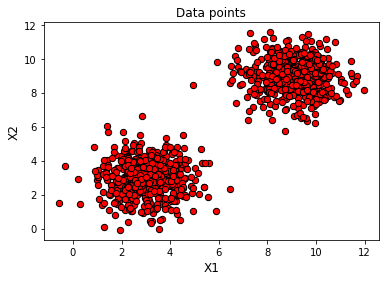

In [2]:
X_normal, X_new_normal,X_noise=X_Values(2)


# Anomaly Score For Proximity to Mean

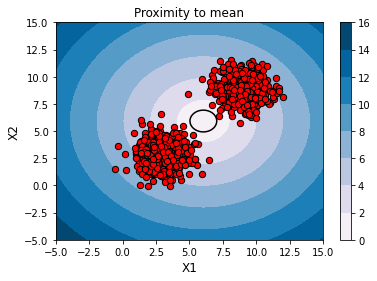

In [3]:
import statistics
import math


X_normal_mean = np.mean(X_normal,axis=0)                                 # Taking mean Value of X normal

xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 15, 200)) # Creating mash grid
a =(np.c_[xx.ravel(), yy.ravel()])                                       

Distance=X_normal_mean-a                                                # Taking distance from mean value as anomaly scores

Z_h = np.sqrt(np.square(Distance[:,0]) + np.square(Distance[:,1]))      

title1='Proximity to mean'

MeshPlot(Z_h,title1,X_normal)

# SVM

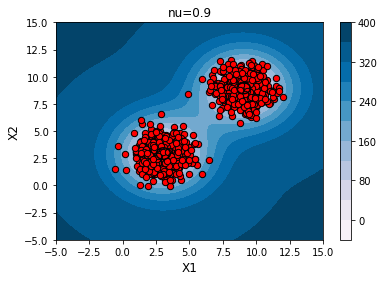

In [33]:
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 15, 200))

SVM= SV(nu=.9,kernel="rbf",gamma=.1)

SVM.fit(X_normal)

Z_nu_h = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)

title1='nu=0.9'

MeshPlot(Z_nu_h,title1,X_normal)

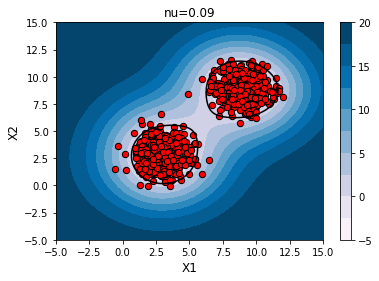

In [34]:
SVM= SV(nu=.09,kernel="rbf",gamma=.1)

SVM.fit(X_normal)

Z_nu_l = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)

title2='nu=0.09'

MeshPlot(Z_nu_l,title2,X_normal)

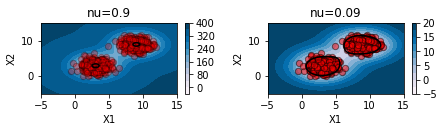

In [35]:
lv=1
MeshPlot2(Z_nu_h,Z_nu_l,title1,title2,X_normal,lv)

# Effect of variation in One class SVM Parameter gamma

C:\Users\Zubairul\Desktop\Projectmain\Project\Notebook\..\Code1\ZPlot.py:44: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, levels=[1], colors='k')


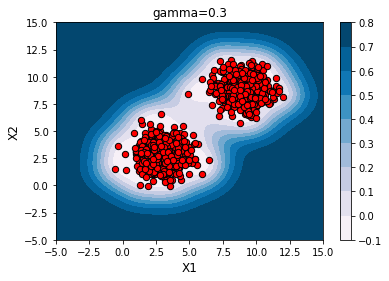

In [36]:
SVM= SV(nu=.01,kernel="rbf", gamma=0.3)

SVM.fit(X_normal)

Z_high = -1*SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])


title1='gamma=0.3'

MeshPlot(Z_high,title1,X_normal)

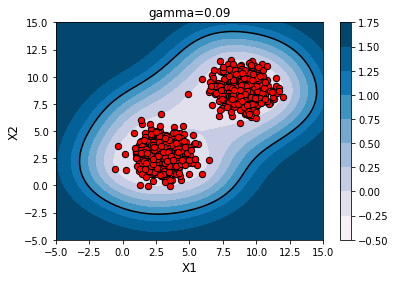

In [37]:
SVM= SV(nu=.01,kernel="rbf",gamma=.09)


SVM.fit(X_normal)

Z_low = -1*SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])


title2='gamma=0.09'

MeshPlot(Z_low,title2,X_normal)

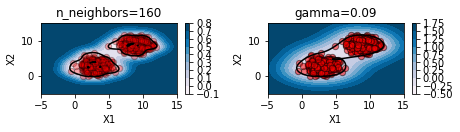

In [52]:
lv=0
MeshPlot2(Z_high,Z_low,title1,title2,X_normal,lv)

# Nearest Neighbors

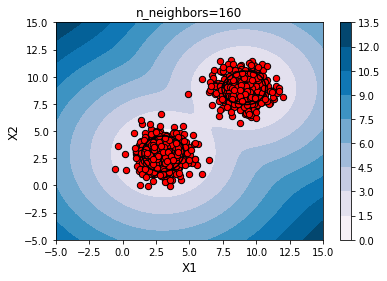

In [39]:
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 15, 200))   #creating rectangular grid

NearestN= NearestNeighbors(n_neighbors=160, algorithm='ball_tree')         #declearing n_neighbors=160

NearestN.fit(X_normal)                                                     # Training model with normal data

distances, indices = NearestN.kneighbors(np.c_[xx.ravel(), yy.ravel()])    # Taking neighbors distances as anomaly scores

Z_h = distances.mean(axis=1)

title1='n_neighbors=160'

MeshPlot(Z_h,title1,X_normal)

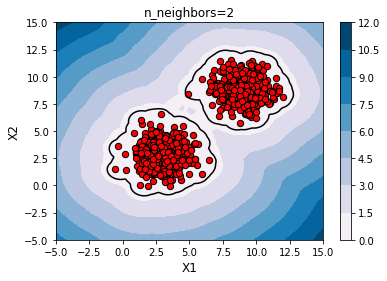

In [11]:
NearestN= NearestNeighbors(n_neighbors=2, algorithm='ball_tree')      #declearing n_neighbors=2

NearestN.fit(X_normal)                                                # Training model with normal data

distances, indices = NearestN.kneighbors(np.c_[xx.ravel(), yy.ravel()]) # Taking neighbors distances as anomaly scores

Z_l = distances.mean(axis=1)
title2='n_neighbors=2'

MeshPlot(Z_l,title2,X_normal)

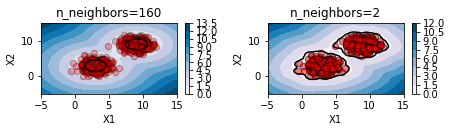

In [12]:
lv=1
MeshPlot2(Z_h,Z_l,title1,title2,X_normal,lv)

# Isoation Forest

C:\Users\Zubairul\Desktop\Projectmain\Project\Notebook\..\Code1\ZPlot.py:44: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, levels=[1], colors='k')


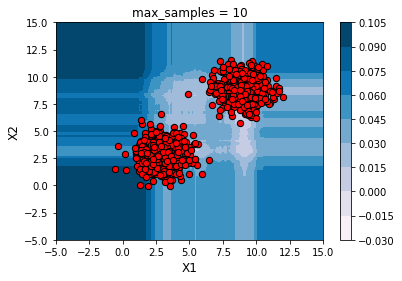

In [53]:
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 15, 200))     #creating rectangular grid

model_Iso= IsolationForest(max_samples = 10)                                 #declearing max sample=10

model_Iso.fit(X_normal)                                                      # Training model with normal data

Iso_h_a= model_Iso.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)         # Getting decision for each point of rectangular grid                                        # Reshaping decision function for ploting

# Ploting figure
title1='max_samples = 10'

MeshPlot(Iso_h_a,title1,X_normal)

C:\Users\Zubairul\Desktop\Projectmain\Project\Notebook\..\Code1\ZPlot.py:44: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, levels=[1], colors='k')


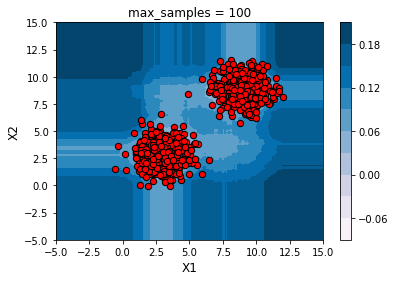

In [54]:
model_Iso= IsolationForest(max_samples = 100)                             #declearing max sample=100

model_Iso.fit(X_normal)                                                  # Training model with normal data

Iso_h_b= model_Iso.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)      # Getting decision for each point of rectangular grid

# Ploting figure
title2='max_samples = 100'

MeshPlot(Iso_h_b,title2,X_normal)

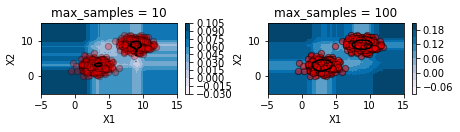

In [64]:
lv=0
MeshPlot2(Iso_h_a,Iso_h_b,title1,title2,X_normal,lv)

# checking Effect of n_estimators

C:\Users\Zubairul\Desktop\Projectmain\Project\Notebook\..\Code1\ZPlot.py:44: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, levels=[1], colors='k')


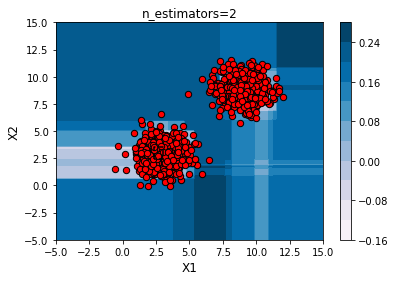

In [16]:
model_Iso= IsolationForest(n_estimators=2)                               #declearing n_estimators=2                            
model_Iso.fit(X_normal)                                                  # Training model with normal data

Iso_nh= model_Iso.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)      # Getting decision for each point of rectangular grid


# Ploting figure
title1='n_estimators=2'

MeshPlot(Iso_nh,title1,X_normal)

C:\Users\Zubairul\Desktop\Projectmain\Project\Notebook\..\Code1\ZPlot.py:44: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, levels=[1], colors='k')


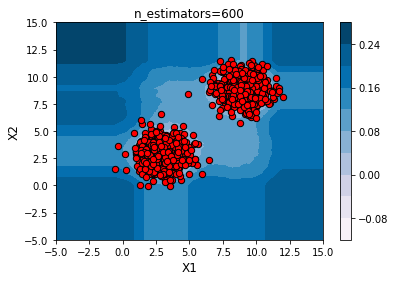

In [17]:
from sklearn.ensemble import IsolationForest

model_Iso= IsolationForest(n_estimators=600)                              #declearing n_estimators=600


model_Iso.fit(X_normal)                                                   # Training model with normal data
Iso_nl= model_Iso.decision_function(np.c_[xx.ravel(), yy.ravel()]) *(-1)      # Getting decision for each point of rectangular grid  

# Ploting figure
title2='n_estimators=600'

MeshPlot(Iso_nl,title2,X_normal)

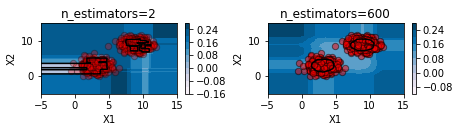

In [18]:
# Ploting 2 figures in one window
lv=0
MeshPlot2(Iso_nh,Iso_nl,title1,title2,X_normal,lv)

# Local Outliuer Factor

# Effect of Neighbor

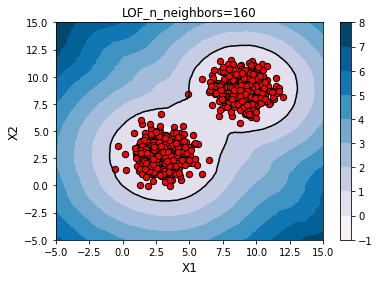

In [19]:
from sklearn.neighbors import LocalOutlierFactor
LO= LocalOutlierFactor(n_neighbors=160,novelty="true")                               #declearing n_estimators=2                            
LO.fit(X_normal)                                                  # Training model with normal data

LO_nh= LO.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)      # Getting decision for each point of rectangular grid


# Ploting figure
title1='LOF_n_neighbors=160'

MeshPlot(LO_nh,title1,X_normal)

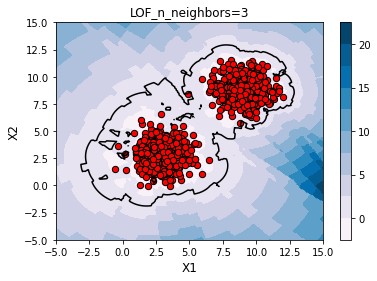

In [20]:
LO= LocalOutlierFactor(n_neighbors=3,novelty="true")                               #declearing n_estimators=2                            
LO.fit(X_normal)                                                  # Training model with normal data

LO_nl= LO.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)      # Getting decision for each point of rectangular grid


# Ploting figure
title2='LOF_n_neighbors=3'

MeshPlot(LO_nl,title2,X_normal)

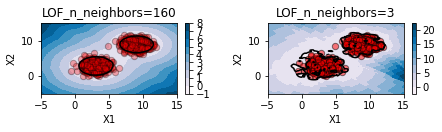

In [21]:
lv=0
MeshPlot2(LO_nh,LO_nl,title1,title2,X_normal,lv)

# Effect of Contamination

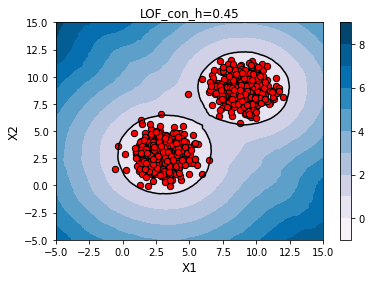

In [22]:
from sklearn.neighbors import LocalOutlierFactor
LO= LocalOutlierFactor(n_neighbors=160,novelty="true", contamination=0.45)                               #declearing n_estimators=2                            
LO.fit(X_normal)                                                  # Training model with normal data

LO_con_h= LO.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)      # Getting decision for each point of rectangular grid


# Ploting figure
title1='LOF_con_h=0.45'

MeshPlot(LO_con_h,title1,X_normal)

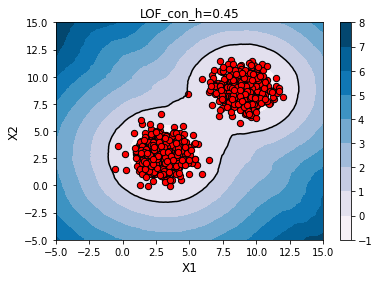

In [23]:
from sklearn.neighbors import LocalOutlierFactor
LO= LocalOutlierFactor(n_neighbors=160,novelty="true", contamination=0.04)                               #declearing n_estimators=2                            
LO.fit(X_normal)                                                  # Training model with normal data

LO_con_l= LO.decision_function(np.c_[xx.ravel(), yy.ravel()])*(-1)      # Getting decision for each point of rectangular grid


# Ploting figure
title2='LOF_con_l=0.04'

MeshPlot(LO_con_l,title1,X_normal)

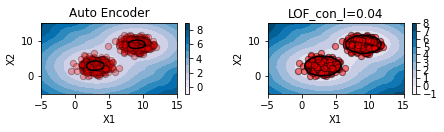

In [32]:
lv=0
MeshPlot2(LO_con_h,LO_con_l,title1,title2,X_normal,lv)

# Auto Encoder

# Effect of n_components

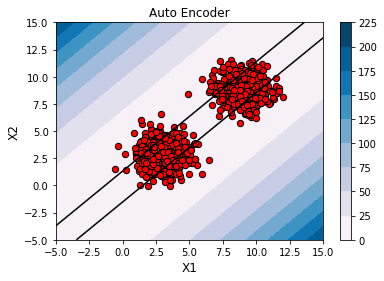

In [25]:
X_conc=np.vstack([X_normal,X_new_normal])                   # concatenate X_normal and X_new_normal data for applying PCA

error_record=[]

xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 15, 200))

pca = PCA(n_components=1)                                  # Declering PCA with component 1
pca_norm = pca.fit (X_conc)                                # Fit the PCA with X_conc


pca2_results = pca.transform(np.c_[xx.ravel(), yy.ravel()])#Applying PCA on each point of the rectangular grid
pca2_proj_back=pca.inverse_transform(pca2_results)         #Applying inversePCA on each point of the rectangular grid
diff = ((np.c_[xx.ravel(), yy.ravel()])-pca2_proj_back)    #Calculating the difference betwen pca2_results and pca2_proj_back
diff_sq = diff * diff                                      # Taking square of diff for further use
errs = np.sum(diff_sq, axis=1)                             # Calculating the regenaration error 
total_loss = errs.reshape(xx.shape)

title1='Auto Encoder'

MeshPlot(total_loss,title1,X_normal)